# Utilizing positioning data

The accompanying dataset contains sensors data from a positioning system, attached to a Leverkusen junior soccer player. The purpose is to collect informatin about each player and the team for player and team development purposes. The data contains sensor readings

 - Lateral accelarations from Inertial Measuremnt Unit (IMU)
 - Angular accelerations from IMU
 - Latitude and longitude from Global Navigation Satellite System (GNSS)
 - And some other sensor and calculated data

Some of the last columns do not contain any values. And some time in the beginning the GNSS positioning is not working, and therefore the latitude and longitude is available only after some time. 

Each row contains a sensor reading during a specific time. The time interval between the samples (=rows) is 1/100 s. 

It is easiest to read complex CSV-files with a sophisticated pandas `read_csv()` -function.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# You can try to use Seaborn. It changes the layout of the graphics, use it if you like
#import seaborn as sns
#sns.set()

## Read the data

1. Examine the data in the editor, to seet what it's structure is (CSV:s are sometimes rather badly formed, in this case it is quite Ok though)
1. Read the data from the file `101666_1678179706_4556.csv` to pandas dataframe called as `D_all`. Notice that there are a few first lines which are not in CSV form. They must be skipped.
2. Check the first five rows of the data to see that you have correctly read it.
3. Assign the number of rows of the whole dataset to varible `n` and number of columns to variable `p`

**TIP**: It is a good strategy to place the data reading part (which takes a lot of time and resources) in a separate cell, and read it only once, and the work with it with repetitive tasks in the next cells.


In [9]:
# Read the data here to D_all
# YOUR CODE HERE
D_all=pd.read_csv("101666_1678179706_4556.csv",skiprows=3)
D_all

,Acceleration.forward,Acceleration.side,Acceleration.up,Rotation.roll,Rotation.pitch,Rotation.yaw,RawPlayerLoad,SmoothedPlayerLoad,imuAcceleration.forward,imuAcceleration.side,...,Longitude,Odometer,RawVelocity,SmoothedVelocity,GNSS.LPS.Acceleration,MetabolicPower,GNSS.Fix,GNSS.Strength,GNSS.HDOP,HeartRate
0,-0.569184,0.520784,0.391072,68.564000,-53.375000,8.540,0.457031,0.299429,-0.568404,0.512275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,-0.555148,0.438504,0.498520,55.754000,-32.879000,-17.385,0.221680,0.308917,-0.551497,0.418696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-0.569668,0.408012,0.530948,47.702000,-20.008000,-41.358,0.116211,0.318291,-0.561481,0.378393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.600644,0.494648,0.530464,34.465000,-7.198000,-59.597,0.085938,0.327529,-0.586356,0.456580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-0.642268,0.500940,0.577896,24.644001,-4.880000,-80.032,0.070312,0.336599,-0.619121,0.451519,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455606,-0.012100,0.003388,1.154824,-4.819000,15.006001,4.209,0.225586,1.312105,0.057842,0.050718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455607,-0.026136,-0.026620,0.982036,-0.244000,-0.122000,0.305,0.074707,1.271817,0.032771,0.013454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455608,0.015972,-0.004356,1.031888,0.305000,0.915000,0.244,0.026367,1.230705,0.076418,0.036884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
455609,-0.031944,-0.037268,1.024628,1.708000,-1.403000,-0.366,0.035645,1.189062,0.027420,0.003409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# Then make the further analysis of the data here. D_all is still valid, since it was defined in the previous cell
# YOUR CODE HERE
print(D_all.head())
n=D_all.shape[0]
p=D_all.shape[1]
n,p

   Acceleration.forward  Acceleration.side  Acceleration.up  Rotation.roll  \
0             -0.569184           0.520784         0.391072      68.564000   
1             -0.555148           0.438504         0.498520      55.754000   
2             -0.569668           0.408012         0.530948      47.702000   
3             -0.600644           0.494648         0.530464      34.465000   
4             -0.642268           0.500940         0.577896      24.644001   

   Rotation.pitch  Rotation.yaw  RawPlayerLoad  SmoothedPlayerLoad  \
0         -53.375         8.540       0.457031            0.299429   
1         -32.879       -17.385       0.221680            0.308917   
2         -20.008       -41.358       0.116211            0.318291   
3          -7.198       -59.597       0.085938            0.327529   
4          -4.880       -80.032       0.070312            0.336599   

   imuAcceleration.forward  imuAcceleration.side  ...  Longitude  Odometer  \
0                -0.568404      

(455611, 26)

In [41]:
if 'D_all' not in globals():
    print("D_all not found! Please read the data to D_all.")
elif type(D_all)!=pd.DataFrame:
    print(f"D_all is not a pandas data frame", type(D_all))
elif 'n' not in globals():
    print("n not found! Please assign the number of rows in D_all to n.")
elif 'p' not in globals():
    print("p not found! Please assign the number of columns in D_all to p")
else:
    print("No errors found this far. Your code may work.")


No errors found this far. Your code may work.


## Remove rows with missing coordinate data

1. Study the data with the `describe()` -function. How many values there are in each column. Assign in variable `nL`, How many rows have data ain `Longitude` -column.
2. Drop each row, where the Longitude-value is missing. and assign the result to new data-frame `D`

In [38]:
# YOUR CODE HERE
print(D_all.describe())
nL=D_all['Longitude'].count()
D=D_all.dropna(subset=['Longitude'])
print(D)
nL,D.shape
#print(D)

       Acceleration.forward  Acceleration.side  Acceleration.up  \
count         455611.000000      455611.000000    455611.000000   
mean              -0.406693           0.042882         0.702822   
std                0.414722           0.329580         0.646886   
min              -14.844764         -15.317147        -5.455648   
25%               -0.732292          -0.099704         0.162140   
50%               -0.298144           0.038236         0.892980   
75%               -0.157784           0.201828         0.986876   
max               11.735548           9.830040        15.799212   

       Rotation.roll  Rotation.pitch   Rotation.yaw  RawPlayerLoad  \
count  455611.000000   455611.000000  455611.000000  455611.000000   
mean        0.403699       -0.542466       0.493093       0.078617   
std        46.404008       50.671921      70.492233       0.203868   
min     -1005.219000    -1988.478000   -1998.787000       0.000000   
25%        -7.442000       -7.869000     -10.0

(28834, (28834, 26))

In [42]:
errorfound=False
Ncorrect=0
if ('D' not in globals()) or ('nL' not in globals()):
    print("D or nL is not found! Please Store the reduced data frame as D, and number of values in nL")
    errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")


No errrors found this far, your code may work :)


#### Plot the data
1. Study the column names, by printing the `D.columns` variable
1. Plot the three accelerations: `Acceleration.forward`, `Acceleration.side`, and `Acceleration.up` between rows (=samples) between 0-500 in the same figure. Use the `D.plot()` and assign the resulting figure to the variable called `fig`, as follows: `fig = D.plot(...`
2. Define the label for y-axis. You can use LaTeX strings as follows `'Acceleration $\cdot 10 m/s^2$' `. The part between dollar signs is interpreted as mathematical expression.
3. Define also the label for x-axis. It is the time in centiseconds or 10 ms.

**TIP**: It is easiest to plot Pandas dataframes by just using the build in `plot()` function of the dataframe object. Study its properties by writing `D.plot` and then hitting the `Shift-TAB` button combination. You should see the documentation of print

Index(['Acceleration.forward', 'Acceleration.side', 'Acceleration.up',
       'Rotation.roll', 'Rotation.pitch', 'Rotation.yaw', 'RawPlayerLoad',
       'SmoothedPlayerLoad', 'imuAcceleration.forward', 'imuAcceleration.side',
       'imuAcceleration.up', 'imuOrientation.forward', 'imuOrientation.side',
       'imuOrientation.up', 'Facing', 'Latitude', 'Longitude', 'Odometer',
       'RawVelocity', 'SmoothedVelocity', 'GNSS.LPS.Acceleration',
       'MetabolicPower', 'GNSS.Fix', 'GNSS.Strength', 'GNSS.HDOP',
       'HeartRate'],
      dtype='object')


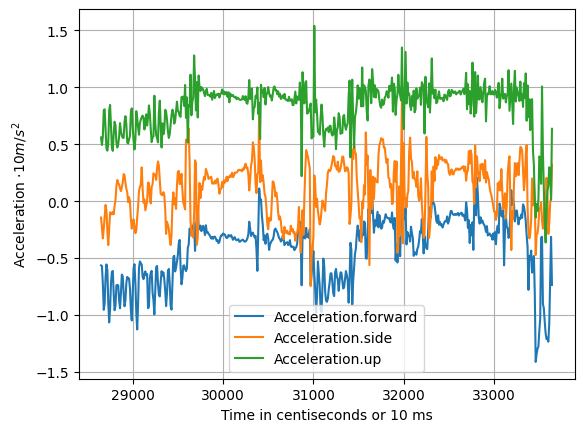

In [44]:
# YOUR CODE HERE
print(D.columns)
fig=D[['Acceleration.forward','Acceleration.side','Acceleration.up']].iloc[0:500].plot()
fig.set_ylabel('Acceleration $\cdot 10 m/s^2$')
fig.set_xlabel('Time in centiseconds or 10 ms')
fig.grid(True)


In [45]:
errorfound=False
Ncorrect=0
if 'fig' not in globals():
    print("fig not found! Please plot the figure, and store it to variable fig.")
    errorfound=True
else:
    Ncorrect+=1
    if fig.axes.get_xlabel().startswith('Time'):
        Ncorrect +=1
    else:
        print("X-axis label not set or not correct. Please recheck.")
        errorfound=True
    if fig.axes.get_ylabel().startswith('Acce'):
        Ncorrect+=1
    else:
        print("Y-axis label not set or not correct. Please recheck.")
        errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")
         

No errrors found this far, your code may work :)


## Scatterplot
1. Make scatterplot of two columns `Latitude` and `Longitude` of the data between rows 0:500, and store the figure as `fig_scatter`. Make sure that Latitude is in the x-axis.

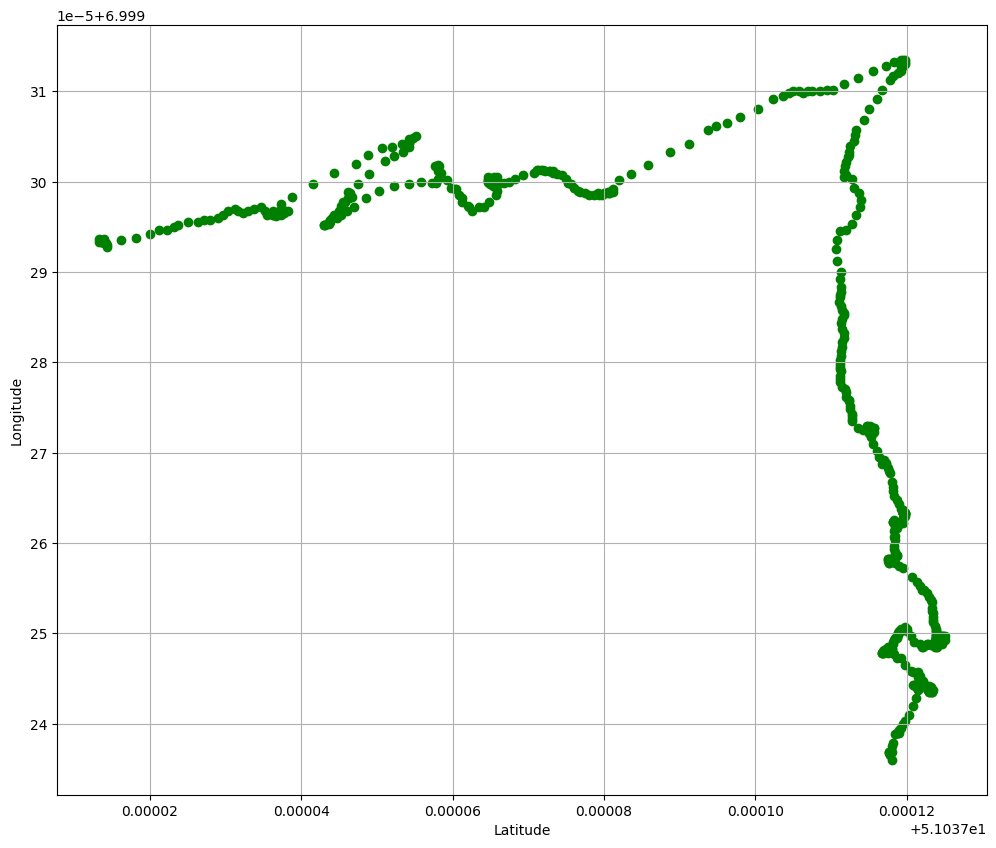

In [46]:
# YOUR CODE HERE
#fig_scatter=D[['Latitude','Longitude']].iloc[0:500].plot.scatter(x='Latitude',y='Longitude')
#fig_scatter.grid(True)
fig_scatter, axes = plt.subplots(figsize=(12, 10))
axes.scatter(D['Latitude'].iloc[0:500], D['Longitude'].iloc[0:500],color='green')

# Set labels and title
axes.set_xlabel('Latitude')
axes.set_ylabel('Longitude')
axes.grid(True)

#xlabel = fig_scatter.axes[0].get_xlabel()
#print(xlabel)

In [47]:
errorfound=False
Ncorrect=0
if 'fig_scatter' not in globals():
    print("fig_scatter not found! Please plot the figure, and store it to variable fig.")
    errorfound=True
else:
    if type(fig_scatter.axes)==list:
        xlabel = fig_scatter.axes[0].get_xlabel()
        print('list')
    else:
        print('No list')
        xlabel = fig_scatter.axes.get_xlabel()
    if xlabel.startswith('Lati'):
        Ncorrect +=1
    else:
        print("There is something wrong, plese recheckd")
        errorfound=True
if not errorfound:
    print("No errrors found this far, your code may work :)")
         

list
No errrors found this far, your code may work :)
